# Pytorch Tutorial

Pytorch is a popular deep learning framework and it's easy to get started.

In [0]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import time

BATCH_SIZE = 128
NUM_EPOCHS = 1

First, we read the mnist data, preprocess them and encapsulate them into dataloader form.

In [0]:
# preprocessing
normalize = transforms.Normalize(mean=[.5], std=[.5])
transform = transforms.Compose([transforms.ToTensor(), normalize])

# download and load the data
train_dataset = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./mnist/', train=False, transform=transform, download=False)

# encapsulate them into dataloader form
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

Then, we define the model, object function and optimizer that we use to classify.

In [0]:
# TODO:define model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = SimpleNet()

# TODO:define loss function and optimiter
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

Next, we can start to train and evaluate!

In [4]:
# train and evaluate
total_step = len(train_loader)
loss_list = []
acc_list = []

for epoch in range(NUM_EPOCHS):
    for images, labels in tqdm(train_loader):
        # TODO:forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)
        print('Epoch [{', epoch+1, '}/{', NUM_EPOCHS, '}]', 'Loss:', loss.item(), 'Accuracy:', (correct / total) * 100)

  0%|          | 1/468 [00:00<02:28,  3.14it/s]

Epoch [{ 1 }/{ 1 }] Loss: 2.3074405193328857 Accuracy: 11.71875


  0%|          | 2/468 [00:00<02:22,  3.28it/s]

Epoch [{ 1 }/{ 1 }] Loss: 3.0130081176757812 Accuracy: 7.03125


  1%|          | 3/468 [00:00<02:14,  3.45it/s]

Epoch [{ 1 }/{ 1 }] Loss: 2.4160048961639404 Accuracy: 32.8125


  1%|          | 4/468 [00:01<02:08,  3.60it/s]

Epoch [{ 1 }/{ 1 }] Loss: 2.2668070793151855 Accuracy: 39.84375


  1%|          | 5/468 [00:01<02:05,  3.70it/s]

Epoch [{ 1 }/{ 1 }] Loss: 2.2209529876708984 Accuracy: 55.46875


  1%|▏         | 6/468 [00:01<02:04,  3.70it/s]

Epoch [{ 1 }/{ 1 }] Loss: 2.035338878631592 Accuracy: 58.59375


  1%|▏         | 7/468 [00:01<02:01,  3.80it/s]

Epoch [{ 1 }/{ 1 }] Loss: 1.9997917413711548 Accuracy: 37.5


  2%|▏         | 8/468 [00:02<01:59,  3.83it/s]

Epoch [{ 1 }/{ 1 }] Loss: 1.7883414030075073 Accuracy: 45.3125


  2%|▏         | 9/468 [00:02<01:58,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 1.5787434577941895 Accuracy: 67.1875


  2%|▏         | 10/468 [00:02<01:57,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 1.4309260845184326 Accuracy: 70.3125


  2%|▏         | 11/468 [00:02<01:56,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 1.1472809314727783 Accuracy: 71.875


  3%|▎         | 12/468 [00:03<01:55,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 1.015178918838501 Accuracy: 71.875


  3%|▎         | 13/468 [00:03<01:56,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.9096639752388 Accuracy: 65.625


  3%|▎         | 14/468 [00:03<01:56,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.8907427191734314 Accuracy: 74.21875


  3%|▎         | 15/468 [00:03<01:55,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.7999621629714966 Accuracy: 73.4375


  3%|▎         | 16/468 [00:04<01:53,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.703464925289154 Accuracy: 77.34375


  4%|▎         | 17/468 [00:04<01:55,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.7361424565315247 Accuracy: 72.65625


  4%|▍         | 18/468 [00:04<01:55,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.6162564754486084 Accuracy: 77.34375


  4%|▍         | 19/468 [00:04<01:53,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.5718265771865845 Accuracy: 83.59375


  4%|▍         | 20/468 [00:05<01:51,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.8768641352653503 Accuracy: 74.21875


  4%|▍         | 21/468 [00:05<01:50,  4.04it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.6670897006988525 Accuracy: 78.90625


  5%|▍         | 22/468 [00:05<01:50,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.4783600866794586 Accuracy: 85.9375


  5%|▍         | 23/468 [00:05<01:51,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.511369526386261 Accuracy: 83.59375


  5%|▌         | 24/468 [00:06<01:50,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.5556637644767761 Accuracy: 80.46875


  5%|▌         | 25/468 [00:06<01:49,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.3956785500049591 Accuracy: 85.9375


  6%|▌         | 26/468 [00:06<01:49,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.5866354703903198 Accuracy: 83.59375


  6%|▌         | 27/468 [00:06<01:48,  4.07it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.5736901164054871 Accuracy: 80.46875


  6%|▌         | 28/468 [00:07<01:50,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.29612404108047485 Accuracy: 90.625


  6%|▌         | 29/468 [00:07<01:48,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.4955770671367645 Accuracy: 85.15625


  6%|▋         | 30/468 [00:07<01:50,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.32378795742988586 Accuracy: 91.40625


  7%|▋         | 31/468 [00:07<01:48,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.5063879489898682 Accuracy: 83.59375


  7%|▋         | 32/468 [00:08<01:50,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.45351749658584595 Accuracy: 85.15625


  7%|▋         | 33/468 [00:08<01:50,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.41679006814956665 Accuracy: 85.15625


  7%|▋         | 34/468 [00:08<01:50,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.3140471577644348 Accuracy: 92.1875


  7%|▋         | 35/468 [00:08<01:50,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.38500314950942993 Accuracy: 89.0625


  8%|▊         | 36/468 [00:09<01:51,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.4275398552417755 Accuracy: 89.84375


  8%|▊         | 37/468 [00:09<01:50,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2506396174430847 Accuracy: 91.40625


  8%|▊         | 38/468 [00:09<01:49,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.40612152218818665 Accuracy: 91.40625


  8%|▊         | 39/468 [00:09<01:47,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1970289796590805 Accuracy: 94.53125


  9%|▊         | 40/468 [00:10<01:48,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.3263944983482361 Accuracy: 91.40625


  9%|▉         | 41/468 [00:10<01:48,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.25358328223228455 Accuracy: 92.96875


  9%|▉         | 42/468 [00:10<01:47,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.30123353004455566 Accuracy: 91.40625


  9%|▉         | 43/468 [00:10<01:46,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.3837554156780243 Accuracy: 85.9375


  9%|▉         | 44/468 [00:11<01:45,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.43386128544807434 Accuracy: 90.625


 10%|▉         | 45/468 [00:11<01:45,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.24856317043304443 Accuracy: 92.1875


 10%|▉         | 46/468 [00:11<01:45,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.31684058904647827 Accuracy: 89.84375


 10%|█         | 47/468 [00:11<01:45,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.28297555446624756 Accuracy: 89.0625


 10%|█         | 48/468 [00:12<01:45,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.36464443802833557 Accuracy: 90.625


 10%|█         | 49/468 [00:12<01:45,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.27175021171569824 Accuracy: 92.1875


 11%|█         | 50/468 [00:12<01:46,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.25357773900032043 Accuracy: 89.84375


 11%|█         | 51/468 [00:12<01:45,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.3055739104747772 Accuracy: 90.625


 11%|█         | 52/468 [00:13<01:44,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.305681049823761 Accuracy: 90.625


 11%|█▏        | 53/468 [00:13<01:43,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2688921093940735 Accuracy: 90.625


 12%|█▏        | 54/468 [00:13<01:44,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.17708739638328552 Accuracy: 94.53125


 12%|█▏        | 55/468 [00:13<01:44,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21764788031578064 Accuracy: 92.1875


 12%|█▏        | 56/468 [00:14<01:45,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.24351440370082855 Accuracy: 96.09375


 12%|█▏        | 57/468 [00:14<01:46,  3.85it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.3854891061782837 Accuracy: 88.28125


 12%|█▏        | 58/468 [00:14<01:46,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.3404613137245178 Accuracy: 89.0625


 13%|█▎        | 59/468 [00:14<01:44,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2641788721084595 Accuracy: 92.1875


 13%|█▎        | 60/468 [00:15<01:44,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.24257595837116241 Accuracy: 94.53125


 13%|█▎        | 61/468 [00:15<01:44,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2030768245458603 Accuracy: 94.53125


 13%|█▎        | 62/468 [00:15<01:44,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2823675274848938 Accuracy: 91.40625


 13%|█▎        | 63/468 [00:16<01:45,  3.85it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.23555448651313782 Accuracy: 91.40625


 14%|█▎        | 64/468 [00:16<01:43,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.30251795053482056 Accuracy: 90.625


 14%|█▍        | 65/468 [00:16<01:42,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.41542455554008484 Accuracy: 89.0625


 14%|█▍        | 66/468 [00:16<01:43,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.23803021013736725 Accuracy: 92.1875


 14%|█▍        | 67/468 [00:17<01:43,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.20104219019412994 Accuracy: 93.75


 15%|█▍        | 68/468 [00:17<01:42,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21621690690517426 Accuracy: 93.75


 15%|█▍        | 69/468 [00:17<01:40,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2877601683139801 Accuracy: 92.1875


 15%|█▍        | 70/468 [00:17<01:43,  3.84it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.38911446928977966 Accuracy: 88.28125


 15%|█▌        | 71/468 [00:18<01:41,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1797783374786377 Accuracy: 95.3125


 15%|█▌        | 72/468 [00:18<01:40,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.19339634478092194 Accuracy: 95.3125


 16%|█▌        | 73/468 [00:18<01:41,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.26442867517471313 Accuracy: 92.96875


 16%|█▌        | 74/468 [00:18<01:40,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.33101391792297363 Accuracy: 86.71875


 16%|█▌        | 75/468 [00:19<01:39,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1738433539867401 Accuracy: 94.53125


 16%|█▌        | 76/468 [00:19<01:38,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21182091534137726 Accuracy: 92.1875


 16%|█▋        | 77/468 [00:19<01:37,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.20953848958015442 Accuracy: 92.96875


 17%|█▋        | 78/468 [00:19<01:36,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2516084909439087 Accuracy: 89.84375


 17%|█▋        | 79/468 [00:20<01:36,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16627444326877594 Accuracy: 95.3125


 17%|█▋        | 80/468 [00:20<01:36,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2808089256286621 Accuracy: 90.625


 17%|█▋        | 81/468 [00:20<01:36,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.25985783338546753 Accuracy: 92.1875


 18%|█▊        | 82/468 [00:20<01:37,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2569744288921356 Accuracy: 92.1875


 18%|█▊        | 83/468 [00:21<01:38,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2182510644197464 Accuracy: 93.75


 18%|█▊        | 84/468 [00:21<01:37,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.23447076976299286 Accuracy: 93.75


 18%|█▊        | 85/468 [00:21<01:39,  3.83it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14799535274505615 Accuracy: 96.875


 18%|█▊        | 86/468 [00:21<01:39,  3.82it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1505090445280075 Accuracy: 95.3125


 19%|█▊        | 87/468 [00:22<01:38,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.36335673928260803 Accuracy: 92.1875


 19%|█▉        | 88/468 [00:22<01:37,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12275873869657516 Accuracy: 95.3125


 19%|█▉        | 89/468 [00:22<01:35,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11663641035556793 Accuracy: 97.65625


 19%|█▉        | 90/468 [00:22<01:35,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.25093838572502136 Accuracy: 93.75


 19%|█▉        | 91/468 [00:23<01:34,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15828202664852142 Accuracy: 94.53125


 20%|█▉        | 92/468 [00:23<01:33,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.23156516253948212 Accuracy: 92.96875


 20%|█▉        | 93/468 [00:23<01:33,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1948636770248413 Accuracy: 96.09375


 20%|██        | 94/468 [00:23<01:33,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18322880566120148 Accuracy: 93.75


 20%|██        | 95/468 [00:24<01:33,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.29099413752555847 Accuracy: 92.96875


 21%|██        | 96/468 [00:24<01:32,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12889689207077026 Accuracy: 95.3125


 21%|██        | 97/468 [00:24<01:32,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13405919075012207 Accuracy: 96.09375


 21%|██        | 98/468 [00:24<01:32,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2129826694726944 Accuracy: 92.96875


 21%|██        | 99/468 [00:25<01:31,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21377143263816833 Accuracy: 92.1875


 21%|██▏       | 100/468 [00:25<01:30,  4.05it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.24042415618896484 Accuracy: 93.75


 22%|██▏       | 101/468 [00:25<01:30,  4.06it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10864520817995071 Accuracy: 96.875


 22%|██▏       | 102/468 [00:25<01:32,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18981991708278656 Accuracy: 93.75


 22%|██▏       | 103/468 [00:26<01:31,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16268500685691833 Accuracy: 91.40625


 22%|██▏       | 104/468 [00:26<01:30,  4.04it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1699034869670868 Accuracy: 93.75


 22%|██▏       | 105/468 [00:26<01:31,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18334682285785675 Accuracy: 96.09375


 23%|██▎       | 106/468 [00:26<01:32,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12105413526296616 Accuracy: 96.875


 23%|██▎       | 107/468 [00:27<01:32,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2000940889120102 Accuracy: 92.96875


 23%|██▎       | 108/468 [00:27<01:31,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.20055976510047913 Accuracy: 93.75


 23%|██▎       | 109/468 [00:27<01:30,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12522736191749573 Accuracy: 96.875


 24%|██▎       | 110/468 [00:27<01:29,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16228845715522766 Accuracy: 93.75


 24%|██▎       | 111/468 [00:28<01:29,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12596863508224487 Accuracy: 96.09375


 24%|██▍       | 112/468 [00:28<01:28,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12169802933931351 Accuracy: 96.09375


 24%|██▍       | 113/468 [00:28<01:28,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2611779272556305 Accuracy: 93.75


 24%|██▍       | 114/468 [00:28<01:29,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.4440075159072876 Accuracy: 89.0625


 25%|██▍       | 115/468 [00:29<01:30,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08551188558340073 Accuracy: 96.09375


 25%|██▍       | 116/468 [00:29<01:29,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15932154655456543 Accuracy: 94.53125


 25%|██▌       | 117/468 [00:29<01:27,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13067233562469482 Accuracy: 96.875


 25%|██▌       | 118/468 [00:29<01:27,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21115976572036743 Accuracy: 92.1875


 25%|██▌       | 119/468 [00:30<01:28,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.30900511145591736 Accuracy: 91.40625


 26%|██▌       | 120/468 [00:30<01:28,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.22810828685760498 Accuracy: 93.75


 26%|██▌       | 121/468 [00:30<01:26,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10279935598373413 Accuracy: 96.09375


 26%|██▌       | 122/468 [00:30<01:25,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21509698033332825 Accuracy: 94.53125


 26%|██▋       | 123/468 [00:31<01:26,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.22282558679580688 Accuracy: 94.53125


 26%|██▋       | 124/468 [00:31<01:26,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.19895556569099426 Accuracy: 93.75


 27%|██▋       | 125/468 [00:31<01:25,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.28720396757125854 Accuracy: 92.1875


 27%|██▋       | 126/468 [00:31<01:25,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18623383343219757 Accuracy: 92.96875


 27%|██▋       | 127/468 [00:32<01:25,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18749764561653137 Accuracy: 94.53125


 27%|██▋       | 128/468 [00:32<01:24,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07905349880456924 Accuracy: 97.65625


 28%|██▊       | 129/468 [00:32<01:23,  4.07it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.27569326758384705 Accuracy: 93.75


 28%|██▊       | 130/468 [00:32<01:22,  4.08it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15316635370254517 Accuracy: 94.53125


 28%|██▊       | 131/468 [00:33<01:23,  4.04it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.24661597609519958 Accuracy: 92.1875


 28%|██▊       | 132/468 [00:33<01:22,  4.06it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14960472285747528 Accuracy: 95.3125


 28%|██▊       | 133/468 [00:33<01:22,  4.05it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15340940654277802 Accuracy: 94.53125


 29%|██▊       | 134/468 [00:33<01:22,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14685997366905212 Accuracy: 95.3125


 29%|██▉       | 135/468 [00:34<01:23,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15975211560726166 Accuracy: 94.53125


 29%|██▉       | 136/468 [00:34<01:23,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13434024155139923 Accuracy: 95.3125


 29%|██▉       | 137/468 [00:34<01:23,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.25361281633377075 Accuracy: 93.75


 29%|██▉       | 138/468 [00:34<01:22,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13809818029403687 Accuracy: 96.09375


 30%|██▉       | 139/468 [00:35<01:22,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10604915022850037 Accuracy: 96.875


 30%|██▉       | 140/468 [00:35<01:21,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1924016922712326 Accuracy: 93.75


 30%|███       | 141/468 [00:35<01:21,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15832354128360748 Accuracy: 96.09375


 30%|███       | 142/468 [00:35<01:20,  4.05it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09191841632127762 Accuracy: 96.875


 31%|███       | 143/468 [00:36<01:21,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10166455805301666 Accuracy: 97.65625


 31%|███       | 144/468 [00:36<01:20,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06651110202074051 Accuracy: 99.21875


 31%|███       | 145/468 [00:36<01:20,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1804080605506897 Accuracy: 93.75


 31%|███       | 146/468 [00:36<01:20,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1493081897497177 Accuracy: 93.75


 31%|███▏      | 147/468 [00:37<01:21,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1782618761062622 Accuracy: 95.3125


 32%|███▏      | 148/468 [00:37<01:21,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12054381519556046 Accuracy: 96.875


 32%|███▏      | 149/468 [00:37<01:21,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.19667387008666992 Accuracy: 94.53125


 32%|███▏      | 150/468 [00:37<01:20,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08199886977672577 Accuracy: 96.875


 32%|███▏      | 151/468 [00:38<01:22,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11072728037834167 Accuracy: 95.3125


 32%|███▏      | 152/468 [00:38<01:20,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11104489117860794 Accuracy: 96.875


 33%|███▎      | 153/468 [00:38<01:18,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.17553837597370148 Accuracy: 93.75


 33%|███▎      | 154/468 [00:38<01:17,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2035776823759079 Accuracy: 96.09375


 33%|███▎      | 155/468 [00:39<01:20,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10275200009346008 Accuracy: 97.65625


 33%|███▎      | 156/468 [00:39<01:19,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0876031368970871 Accuracy: 97.65625


 34%|███▎      | 157/468 [00:39<01:20,  3.85it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.20126847922801971 Accuracy: 92.96875


 34%|███▍      | 158/468 [00:39<01:21,  3.82it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1459500789642334 Accuracy: 95.3125


 34%|███▍      | 159/468 [00:40<01:21,  3.79it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.4036298096179962 Accuracy: 92.1875


 34%|███▍      | 160/468 [00:40<01:21,  3.77it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12120935320854187 Accuracy: 94.53125


 34%|███▍      | 161/468 [00:40<01:19,  3.84it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2995002567768097 Accuracy: 96.875


 35%|███▍      | 162/468 [00:41<01:18,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09377787262201309 Accuracy: 96.09375


 35%|███▍      | 163/468 [00:41<01:18,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13811656832695007 Accuracy: 96.09375


 35%|███▌      | 164/468 [00:41<01:17,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12863367795944214 Accuracy: 94.53125


 35%|███▌      | 165/468 [00:41<01:16,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21526791155338287 Accuracy: 92.1875


 35%|███▌      | 166/468 [00:42<01:16,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.3125663995742798 Accuracy: 89.0625


 36%|███▌      | 167/468 [00:42<01:15,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1554737687110901 Accuracy: 95.3125


 36%|███▌      | 168/468 [00:42<01:15,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14132176339626312 Accuracy: 95.3125


 36%|███▌      | 169/468 [00:42<01:14,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1389995664358139 Accuracy: 95.3125


 36%|███▋      | 170/468 [00:43<01:14,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1453428864479065 Accuracy: 94.53125


 37%|███▋      | 171/468 [00:43<01:14,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14018584787845612 Accuracy: 96.09375


 37%|███▋      | 172/468 [00:43<01:14,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1701633334159851 Accuracy: 92.96875


 37%|███▋      | 173/468 [00:43<01:14,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15041027963161469 Accuracy: 93.75


 37%|███▋      | 174/468 [00:44<01:14,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14127667248249054 Accuracy: 94.53125


 37%|███▋      | 175/468 [00:44<01:14,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09905295073986053 Accuracy: 98.4375


 38%|███▊      | 176/468 [00:44<01:14,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18032300472259521 Accuracy: 92.96875


 38%|███▊      | 177/468 [00:44<01:14,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1500592678785324 Accuracy: 94.53125


 38%|███▊      | 178/468 [00:45<01:13,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18721793591976166 Accuracy: 97.65625


 38%|███▊      | 179/468 [00:45<01:13,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08409345895051956 Accuracy: 96.875


 38%|███▊      | 180/468 [00:45<01:13,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13484503328800201 Accuracy: 94.53125


 39%|███▊      | 181/468 [00:45<01:13,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09896421432495117 Accuracy: 95.3125


 39%|███▉      | 182/468 [00:46<01:13,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1117318719625473 Accuracy: 96.875


 39%|███▉      | 183/468 [00:46<01:13,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04687635600566864 Accuracy: 98.4375


 39%|███▉      | 184/468 [00:46<01:12,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13716740906238556 Accuracy: 94.53125


 40%|███▉      | 185/468 [00:46<01:12,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.19954171776771545 Accuracy: 93.75


 40%|███▉      | 186/468 [00:47<01:12,  3.87it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.23592860996723175 Accuracy: 95.3125


 40%|███▉      | 187/468 [00:47<01:12,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10228579491376877 Accuracy: 97.65625


 40%|████      | 188/468 [00:47<01:11,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14307111501693726 Accuracy: 95.3125


 40%|████      | 189/468 [00:47<01:12,  3.87it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07858631759881973 Accuracy: 96.875


 41%|████      | 190/468 [00:48<01:11,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.22035102546215057 Accuracy: 95.3125


 41%|████      | 191/468 [00:48<01:12,  3.85it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1271776407957077 Accuracy: 96.09375


 41%|████      | 192/468 [00:48<01:11,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12827859818935394 Accuracy: 97.65625


 41%|████      | 193/468 [00:48<01:10,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08139997720718384 Accuracy: 98.4375


 41%|████▏     | 194/468 [00:49<01:10,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13034598529338837 Accuracy: 95.3125


 42%|████▏     | 195/468 [00:49<01:11,  3.81it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12575078010559082 Accuracy: 96.09375


 42%|████▏     | 196/468 [00:49<01:10,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12139251828193665 Accuracy: 96.09375


 42%|████▏     | 197/468 [00:49<01:10,  3.82it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08676565438508987 Accuracy: 96.875


 42%|████▏     | 198/468 [00:50<01:10,  3.84it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15212301909923553 Accuracy: 93.75


 43%|████▎     | 199/468 [00:50<01:11,  3.78it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07819057255983353 Accuracy: 96.875


 43%|████▎     | 200/468 [00:50<01:11,  3.76it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07814770936965942 Accuracy: 97.65625


 43%|████▎     | 201/468 [00:51<01:09,  3.82it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18753202259540558 Accuracy: 91.40625


 43%|████▎     | 202/468 [00:51<01:08,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16402162611484528 Accuracy: 93.75


 43%|████▎     | 203/468 [00:51<01:08,  3.85it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08856113255023956 Accuracy: 96.09375


 44%|████▎     | 204/468 [00:51<01:10,  3.75it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16495008766651154 Accuracy: 95.3125


 44%|████▍     | 205/468 [00:52<01:10,  3.74it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09480871260166168 Accuracy: 96.875


 44%|████▍     | 206/468 [00:52<01:10,  3.74it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11518550664186478 Accuracy: 96.09375


 44%|████▍     | 207/468 [00:52<01:08,  3.79it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06614994257688522 Accuracy: 97.65625


 44%|████▍     | 208/468 [00:52<01:07,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04862123727798462 Accuracy: 98.4375


 45%|████▍     | 209/468 [00:53<01:07,  3.85it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06515335291624069 Accuracy: 98.4375


 45%|████▍     | 210/468 [00:53<01:06,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1074804961681366 Accuracy: 96.09375


 45%|████▌     | 211/468 [00:53<01:04,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10871201753616333 Accuracy: 96.875


 45%|████▌     | 212/468 [00:53<01:03,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14687994122505188 Accuracy: 94.53125


 46%|████▌     | 213/468 [00:54<01:04,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10997332632541656 Accuracy: 96.09375


 46%|████▌     | 214/468 [00:54<01:03,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10507318377494812 Accuracy: 96.875


 46%|████▌     | 215/468 [00:54<01:04,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.35171493887901306 Accuracy: 92.96875


 46%|████▌     | 216/468 [00:54<01:03,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11673833429813385 Accuracy: 96.09375


 46%|████▋     | 217/468 [00:55<01:04,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.23505821824073792 Accuracy: 93.75


 47%|████▋     | 218/468 [00:55<01:03,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14768190681934357 Accuracy: 93.75


 47%|████▋     | 219/468 [00:55<01:03,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11623306572437286 Accuracy: 95.3125


 47%|████▋     | 220/468 [00:55<01:02,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12034439295530319 Accuracy: 95.3125


 47%|████▋     | 221/468 [00:56<01:02,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.03888797387480736 Accuracy: 99.21875


 47%|████▋     | 222/468 [00:56<01:02,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15497258305549622 Accuracy: 93.75


 48%|████▊     | 223/468 [00:56<01:02,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18693013489246368 Accuracy: 95.3125


 48%|████▊     | 224/468 [00:56<01:02,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2130015641450882 Accuracy: 93.75


 48%|████▊     | 225/468 [00:57<01:02,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12842273712158203 Accuracy: 96.875


 48%|████▊     | 226/468 [00:57<01:02,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11217648535966873 Accuracy: 96.09375


 49%|████▊     | 227/468 [00:57<01:01,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.20859570801258087 Accuracy: 93.75


 49%|████▊     | 228/468 [00:57<01:00,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.19291344285011292 Accuracy: 92.1875


 49%|████▉     | 229/468 [00:58<01:00,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09434118121862411 Accuracy: 96.09375


 49%|████▉     | 230/468 [00:58<01:00,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18992111086845398 Accuracy: 93.75


 49%|████▉     | 231/468 [00:58<01:00,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09822574257850647 Accuracy: 96.875


 50%|████▉     | 232/468 [00:58<01:00,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11431582272052765 Accuracy: 98.4375


 50%|████▉     | 233/468 [00:59<00:59,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10692243278026581 Accuracy: 96.875


 50%|█████     | 234/468 [00:59<00:59,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14603470265865326 Accuracy: 95.3125


 50%|█████     | 235/468 [00:59<00:59,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11209937930107117 Accuracy: 96.09375


 50%|█████     | 236/468 [00:59<00:58,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0866415873169899 Accuracy: 98.4375


 51%|█████     | 237/468 [01:00<00:57,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.152962327003479 Accuracy: 96.09375


 51%|█████     | 238/468 [01:00<00:57,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.057033125311136246 Accuracy: 98.4375


 51%|█████     | 239/468 [01:00<00:57,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.22777533531188965 Accuracy: 93.75


 51%|█████▏    | 240/468 [01:00<00:57,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.127424418926239 Accuracy: 96.875


 51%|█████▏    | 241/468 [01:01<00:58,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11781490594148636 Accuracy: 95.3125


 52%|█████▏    | 242/468 [01:01<00:58,  3.87it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07330802828073502 Accuracy: 98.4375


 52%|█████▏    | 243/468 [01:01<00:57,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13241946697235107 Accuracy: 95.3125


 52%|█████▏    | 244/468 [01:01<00:56,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15606871247291565 Accuracy: 95.3125


 52%|█████▏    | 245/468 [01:02<00:56,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12756937742233276 Accuracy: 93.75


 53%|█████▎    | 246/468 [01:02<00:56,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.17973333597183228 Accuracy: 96.09375


 53%|█████▎    | 247/468 [01:02<00:56,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.028097840026021004 Accuracy: 99.21875


 53%|█████▎    | 248/468 [01:03<00:55,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09977293014526367 Accuracy: 96.875


 53%|█████▎    | 249/468 [01:03<00:55,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04824802652001381 Accuracy: 99.21875


 53%|█████▎    | 250/468 [01:03<00:55,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12512028217315674 Accuracy: 96.09375


 54%|█████▎    | 251/468 [01:03<00:55,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07803886383771896 Accuracy: 96.875


 54%|█████▍    | 252/468 [01:04<00:55,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.192485511302948 Accuracy: 93.75


 54%|█████▍    | 253/468 [01:04<00:54,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09334015846252441 Accuracy: 96.875


 54%|█████▍    | 254/468 [01:04<00:55,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07220194488763809 Accuracy: 98.4375


 54%|█████▍    | 255/468 [01:04<00:55,  3.87it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16979971528053284 Accuracy: 94.53125


 55%|█████▍    | 256/468 [01:05<00:54,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.20598402619361877 Accuracy: 91.40625


 55%|█████▍    | 257/468 [01:05<00:53,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1655769944190979 Accuracy: 93.75


 55%|█████▌    | 258/468 [01:05<00:53,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08198240399360657 Accuracy: 96.875


 55%|█████▌    | 259/468 [01:05<00:53,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0923113003373146 Accuracy: 97.65625


 56%|█████▌    | 260/468 [01:06<00:52,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0982605516910553 Accuracy: 95.3125


 56%|█████▌    | 261/468 [01:06<00:52,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09804290533065796 Accuracy: 96.09375


 56%|█████▌    | 262/468 [01:06<00:51,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.22039923071861267 Accuracy: 96.09375


 56%|█████▌    | 263/468 [01:06<00:51,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12331099808216095 Accuracy: 95.3125


 56%|█████▋    | 264/468 [01:07<00:50,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.20320658385753632 Accuracy: 93.75


 57%|█████▋    | 265/468 [01:07<00:51,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09139537811279297 Accuracy: 97.65625


 57%|█████▋    | 266/468 [01:07<00:50,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09607858210802078 Accuracy: 97.65625


 57%|█████▋    | 267/468 [01:07<00:50,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11217951029539108 Accuracy: 96.875


 57%|█████▋    | 268/468 [01:08<00:50,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12905719876289368 Accuracy: 95.3125


 57%|█████▋    | 269/468 [01:08<00:49,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.28537482023239136 Accuracy: 90.625


 58%|█████▊    | 270/468 [01:08<00:49,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1178819015622139 Accuracy: 97.65625


 58%|█████▊    | 271/468 [01:08<00:49,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11047273874282837 Accuracy: 97.65625


 58%|█████▊    | 272/468 [01:09<00:49,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21106788516044617 Accuracy: 93.75


 58%|█████▊    | 273/468 [01:09<00:49,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09841947257518768 Accuracy: 96.875


 59%|█████▊    | 274/468 [01:09<00:48,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.22018344700336456 Accuracy: 94.53125


 59%|█████▉    | 275/468 [01:09<00:48,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0934453085064888 Accuracy: 96.875


 59%|█████▉    | 276/468 [01:10<00:49,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14827923476696014 Accuracy: 95.3125


 59%|█████▉    | 277/468 [01:10<00:49,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08818753063678741 Accuracy: 96.09375


 59%|█████▉    | 278/468 [01:10<00:48,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0733880028128624 Accuracy: 98.4375


 60%|█████▉    | 279/468 [01:10<00:48,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16423596441745758 Accuracy: 95.3125


 60%|█████▉    | 280/468 [01:11<00:48,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.17348287999629974 Accuracy: 93.75


 60%|██████    | 281/468 [01:11<00:47,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07753492891788483 Accuracy: 97.65625


 60%|██████    | 282/468 [01:11<00:47,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08281338214874268 Accuracy: 97.65625


 60%|██████    | 283/468 [01:11<00:47,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18754354119300842 Accuracy: 96.09375


 61%|██████    | 284/468 [01:12<00:47,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1146344244480133 Accuracy: 95.3125


 61%|██████    | 285/468 [01:12<00:46,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11333498358726501 Accuracy: 96.09375


 61%|██████    | 286/468 [01:12<00:45,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.055759038776159286 Accuracy: 99.21875


 61%|██████▏   | 287/468 [01:12<00:46,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1465240716934204 Accuracy: 94.53125


 62%|██████▏   | 288/468 [01:13<00:45,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1323462426662445 Accuracy: 96.09375


 62%|██████▏   | 289/468 [01:13<00:45,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14635996520519257 Accuracy: 95.3125


 62%|██████▏   | 290/468 [01:13<00:44,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04675010219216347 Accuracy: 99.21875


 62%|██████▏   | 291/468 [01:13<00:44,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.17527027428150177 Accuracy: 94.53125


 62%|██████▏   | 292/468 [01:14<00:43,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07310469448566437 Accuracy: 98.4375


 63%|██████▎   | 293/468 [01:14<00:43,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.22021286189556122 Accuracy: 93.75


 63%|██████▎   | 294/468 [01:14<00:43,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12598437070846558 Accuracy: 95.3125


 63%|██████▎   | 295/468 [01:14<00:42,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11902683228254318 Accuracy: 96.875


 63%|██████▎   | 296/468 [01:15<00:43,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08477459847927094 Accuracy: 96.875


 63%|██████▎   | 297/468 [01:15<00:42,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10332328081130981 Accuracy: 94.53125


 64%|██████▎   | 298/468 [01:15<00:43,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06721176207065582 Accuracy: 98.4375


 64%|██████▍   | 299/468 [01:15<00:42,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0888010561466217 Accuracy: 97.65625


 64%|██████▍   | 300/468 [01:16<00:42,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18035857379436493 Accuracy: 96.09375


 64%|██████▍   | 301/468 [01:16<00:42,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.20258256793022156 Accuracy: 93.75


 65%|██████▍   | 302/468 [01:16<00:41,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11609762907028198 Accuracy: 96.875


 65%|██████▍   | 303/468 [01:16<00:40,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07259000092744827 Accuracy: 97.65625


 65%|██████▍   | 304/468 [01:17<00:40,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07890468835830688 Accuracy: 97.65625


 65%|██████▌   | 305/468 [01:17<00:40,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10609433799982071 Accuracy: 95.3125


 65%|██████▌   | 306/468 [01:17<00:40,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06635578721761703 Accuracy: 96.875


 66%|██████▌   | 307/468 [01:17<00:40,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16060642898082733 Accuracy: 92.96875


 66%|██████▌   | 308/468 [01:18<00:40,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11288125813007355 Accuracy: 96.875


 66%|██████▌   | 309/468 [01:18<00:39,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21871717274188995 Accuracy: 95.3125


 66%|██████▌   | 310/468 [01:18<00:39,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06158273294568062 Accuracy: 98.4375


 66%|██████▋   | 311/468 [01:18<00:41,  3.75it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1283855438232422 Accuracy: 96.09375


 67%|██████▋   | 312/468 [01:19<00:40,  3.81it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.05188445374369621 Accuracy: 98.4375


 67%|██████▋   | 313/468 [01:19<00:40,  3.83it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08215080201625824 Accuracy: 96.875


 67%|██████▋   | 314/468 [01:19<00:39,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12801100313663483 Accuracy: 93.75


 67%|██████▋   | 315/468 [01:19<00:38,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07729344815015793 Accuracy: 96.09375


 68%|██████▊   | 316/468 [01:20<00:38,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07535302639007568 Accuracy: 97.65625


 68%|██████▊   | 317/468 [01:20<00:37,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07991313189268112 Accuracy: 97.65625


 68%|██████▊   | 318/468 [01:20<00:37,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.153175488114357 Accuracy: 94.53125


 68%|██████▊   | 319/468 [01:20<00:37,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.22317826747894287 Accuracy: 96.875


 68%|██████▊   | 320/468 [01:21<00:37,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1024269089102745 Accuracy: 96.09375


 69%|██████▊   | 321/468 [01:21<00:38,  3.84it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1283632218837738 Accuracy: 96.09375


 69%|██████▉   | 322/468 [01:21<00:39,  3.73it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06797728687524796 Accuracy: 98.4375


 69%|██████▉   | 323/468 [01:22<00:38,  3.72it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10041838139295578 Accuracy: 96.875


 69%|██████▉   | 324/468 [01:22<00:39,  3.63it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13119180500507355 Accuracy: 96.875


 69%|██████▉   | 325/468 [01:22<00:39,  3.58it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09925508499145508 Accuracy: 96.09375


 70%|██████▉   | 326/468 [01:22<00:38,  3.71it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08610562980175018 Accuracy: 96.875


 70%|██████▉   | 327/468 [01:23<00:37,  3.79it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.03688780963420868 Accuracy: 100.0


 70%|███████   | 328/468 [01:23<00:36,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12401335686445236 Accuracy: 96.09375


 70%|███████   | 329/468 [01:23<00:35,  3.87it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12114978581666946 Accuracy: 96.09375


 71%|███████   | 330/468 [01:23<00:35,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10784390568733215 Accuracy: 96.875


 71%|███████   | 331/468 [01:24<00:36,  3.80it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16793107986450195 Accuracy: 94.53125


 71%|███████   | 332/468 [01:24<00:35,  3.84it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1837933361530304 Accuracy: 96.875


 71%|███████   | 333/468 [01:24<00:34,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12707193195819855 Accuracy: 92.96875


 71%|███████▏  | 334/468 [01:24<00:34,  3.83it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1266276240348816 Accuracy: 95.3125


 72%|███████▏  | 335/468 [01:25<00:34,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10054410248994827 Accuracy: 97.65625


 72%|███████▏  | 336/468 [01:25<00:34,  3.87it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06001679599285126 Accuracy: 99.21875


 72%|███████▏  | 337/468 [01:25<00:33,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08980897068977356 Accuracy: 98.4375


 72%|███████▏  | 338/468 [01:25<00:33,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07603728771209717 Accuracy: 98.4375


 72%|███████▏  | 339/468 [01:26<00:32,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.087159164249897 Accuracy: 96.875


 73%|███████▎  | 340/468 [01:26<00:32,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07391966134309769 Accuracy: 97.65625


 73%|███████▎  | 341/468 [01:26<00:31,  4.04it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06485044956207275 Accuracy: 96.875


 73%|███████▎  | 342/468 [01:26<00:31,  4.05it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1747593730688095 Accuracy: 96.875


 73%|███████▎  | 343/468 [01:27<00:31,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10528556257486343 Accuracy: 96.09375


 74%|███████▎  | 344/468 [01:27<00:31,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21588127315044403 Accuracy: 92.96875


 74%|███████▎  | 345/468 [01:27<00:30,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04699419438838959 Accuracy: 99.21875


 74%|███████▍  | 346/468 [01:27<00:30,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09703903645277023 Accuracy: 96.09375


 74%|███████▍  | 347/468 [01:28<00:30,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11578065156936646 Accuracy: 96.09375


 74%|███████▍  | 348/468 [01:28<00:30,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0820520669221878 Accuracy: 98.4375


 75%|███████▍  | 349/468 [01:28<00:30,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15137320756912231 Accuracy: 95.3125


 75%|███████▍  | 350/468 [01:28<00:29,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0758638083934784 Accuracy: 96.875


 75%|███████▌  | 351/468 [01:29<00:29,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12138085812330246 Accuracy: 96.09375


 75%|███████▌  | 352/468 [01:29<00:29,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11022467166185379 Accuracy: 96.09375


 75%|███████▌  | 353/468 [01:29<00:28,  4.04it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.05590127781033516 Accuracy: 98.4375


 76%|███████▌  | 354/468 [01:29<00:28,  4.07it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1292433887720108 Accuracy: 96.09375


 76%|███████▌  | 355/468 [01:30<00:28,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.177231103181839 Accuracy: 93.75


 76%|███████▌  | 356/468 [01:30<00:27,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1421111822128296 Accuracy: 96.875


 76%|███████▋  | 357/468 [01:30<00:27,  4.04it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18775731325149536 Accuracy: 94.53125


 76%|███████▋  | 358/468 [01:30<00:27,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12337306886911392 Accuracy: 96.09375


 77%|███████▋  | 359/468 [01:31<00:27,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07771500200033188 Accuracy: 96.09375


 77%|███████▋  | 360/468 [01:31<00:27,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14209692180156708 Accuracy: 96.875


 77%|███████▋  | 361/468 [01:31<00:26,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12657062709331512 Accuracy: 96.09375


 77%|███████▋  | 362/468 [01:31<00:26,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07840624451637268 Accuracy: 97.65625


 78%|███████▊  | 363/468 [01:32<00:27,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.03295065462589264 Accuracy: 99.21875


 78%|███████▊  | 364/468 [01:32<00:26,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.22093789279460907 Accuracy: 92.1875


 78%|███████▊  | 365/468 [01:32<00:26,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13697917759418488 Accuracy: 94.53125


 78%|███████▊  | 366/468 [01:32<00:26,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09097182005643845 Accuracy: 97.65625


 78%|███████▊  | 367/468 [01:33<00:25,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08939924836158752 Accuracy: 96.875


 79%|███████▊  | 368/468 [01:33<00:26,  3.81it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13028214871883392 Accuracy: 93.75


 79%|███████▉  | 369/468 [01:33<00:25,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09615698456764221 Accuracy: 95.3125


 79%|███████▉  | 370/468 [01:34<00:24,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09828720986843109 Accuracy: 96.875


 79%|███████▉  | 371/468 [01:34<00:24,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12257768213748932 Accuracy: 96.875


 79%|███████▉  | 372/468 [01:34<00:24,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1183900386095047 Accuracy: 96.09375


 80%|███████▉  | 373/468 [01:34<00:24,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09808944910764694 Accuracy: 96.09375


 80%|███████▉  | 374/468 [01:35<00:23,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15270739793777466 Accuracy: 94.53125


 80%|████████  | 375/468 [01:35<00:24,  3.82it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10248765349388123 Accuracy: 96.875


 80%|████████  | 376/468 [01:35<00:23,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11541102826595306 Accuracy: 96.09375


 81%|████████  | 377/468 [01:35<00:23,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06807214766740799 Accuracy: 98.4375


 81%|████████  | 378/468 [01:36<00:22,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1803777664899826 Accuracy: 96.09375


 81%|████████  | 379/468 [01:36<00:22,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06533537060022354 Accuracy: 96.875


 81%|████████  | 380/468 [01:36<00:21,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12823647260665894 Accuracy: 95.3125


 81%|████████▏ | 381/468 [01:36<00:21,  4.06it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.18526583909988403 Accuracy: 96.09375


 82%|████████▏ | 382/468 [01:37<00:21,  4.06it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.049094974994659424 Accuracy: 99.21875


 82%|████████▏ | 383/468 [01:37<00:21,  4.05it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07969851791858673 Accuracy: 98.4375


 82%|████████▏ | 384/468 [01:37<00:20,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10092684626579285 Accuracy: 96.875


 82%|████████▏ | 385/468 [01:37<00:20,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08787380158901215 Accuracy: 96.875


 82%|████████▏ | 386/468 [01:38<00:20,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07481921464204788 Accuracy: 97.65625


 83%|████████▎ | 387/468 [01:38<00:20,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04380344599485397 Accuracy: 99.21875


 83%|████████▎ | 388/468 [01:38<00:20,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21469295024871826 Accuracy: 95.3125


 83%|████████▎ | 389/468 [01:38<00:19,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14206154644489288 Accuracy: 96.09375


 83%|████████▎ | 390/468 [01:39<00:19,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14248701930046082 Accuracy: 96.875


 84%|████████▎ | 391/468 [01:39<00:19,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.05671536922454834 Accuracy: 96.875


 84%|████████▍ | 392/468 [01:39<00:19,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1164482831954956 Accuracy: 97.65625


 84%|████████▍ | 393/468 [01:39<00:18,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04931797832250595 Accuracy: 98.4375


 84%|████████▍ | 394/468 [01:40<00:19,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.036521900445222855 Accuracy: 99.21875


 84%|████████▍ | 395/468 [01:40<00:18,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07040329277515411 Accuracy: 96.875


 85%|████████▍ | 396/468 [01:40<00:18,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1280607134103775 Accuracy: 95.3125


 85%|████████▍ | 397/468 [01:40<00:17,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06628970801830292 Accuracy: 98.4375


 85%|████████▌ | 398/468 [01:41<00:17,  4.01it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.17470654845237732 Accuracy: 92.1875


 85%|████████▌ | 399/468 [01:41<00:17,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15105825662612915 Accuracy: 94.53125


 85%|████████▌ | 400/468 [01:41<00:17,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07731209695339203 Accuracy: 97.65625


 86%|████████▌ | 401/468 [01:41<00:16,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07776211947202682 Accuracy: 97.65625


 86%|████████▌ | 402/468 [01:42<00:16,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21084679663181305 Accuracy: 95.3125


 86%|████████▌ | 403/468 [01:42<00:16,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0864352136850357 Accuracy: 96.09375


 86%|████████▋ | 404/468 [01:42<00:15,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15059567987918854 Accuracy: 96.09375


 87%|████████▋ | 405/468 [01:42<00:15,  4.03it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07772964239120483 Accuracy: 97.65625


 87%|████████▋ | 406/468 [01:43<00:15,  4.04it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06679072976112366 Accuracy: 97.65625


 87%|████████▋ | 407/468 [01:43<00:15,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0772242546081543 Accuracy: 96.875


 87%|████████▋ | 408/468 [01:43<00:15,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09896242618560791 Accuracy: 97.65625


 87%|████████▋ | 409/468 [01:43<00:14,  3.99it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14448177814483643 Accuracy: 96.09375


 88%|████████▊ | 410/468 [01:44<00:14,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.05806012079119682 Accuracy: 98.4375


 88%|████████▊ | 411/468 [01:44<00:14,  3.86it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12173192203044891 Accuracy: 96.875


 88%|████████▊ | 412/468 [01:44<00:14,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.055990178138017654 Accuracy: 98.4375


 88%|████████▊ | 413/468 [01:44<00:14,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09698507934808731 Accuracy: 96.875


 88%|████████▊ | 414/468 [01:45<00:13,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14034681022167206 Accuracy: 96.875


 89%|████████▊ | 415/468 [01:45<00:13,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10985221713781357 Accuracy: 96.875


 89%|████████▉ | 416/468 [01:45<00:13,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.05813870579004288 Accuracy: 99.21875


 89%|████████▉ | 417/468 [01:45<00:12,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04792901873588562 Accuracy: 98.4375


 89%|████████▉ | 418/468 [01:46<00:12,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10379402339458466 Accuracy: 96.09375


 90%|████████▉ | 419/468 [01:46<00:12,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.03616965562105179 Accuracy: 99.21875


 90%|████████▉ | 420/468 [01:46<00:12,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.17828814685344696 Accuracy: 96.875


 90%|████████▉ | 421/468 [01:46<00:11,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11795314401388168 Accuracy: 96.875


 90%|█████████ | 422/468 [01:47<00:11,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.027072597295045853 Accuracy: 97.65625


 90%|█████████ | 423/468 [01:47<00:11,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07635964453220367 Accuracy: 98.4375


 91%|█████████ | 424/468 [01:47<00:11,  4.00it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11529502272605896 Accuracy: 96.09375


 91%|█████████ | 425/468 [01:47<00:10,  4.06it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04285525903105736 Accuracy: 99.21875


 91%|█████████ | 426/468 [01:48<00:10,  4.02it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07318654656410217 Accuracy: 98.4375


 91%|█████████ | 427/468 [01:48<00:10,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07079336047172546 Accuracy: 96.875


 91%|█████████▏| 428/468 [01:48<00:10,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.028870776295661926 Accuracy: 99.21875


 92%|█████████▏| 429/468 [01:48<00:09,  3.92it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04274390637874603 Accuracy: 97.65625


 92%|█████████▏| 430/468 [01:49<00:09,  3.87it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12678241729736328 Accuracy: 94.53125


 92%|█████████▏| 431/468 [01:49<00:09,  3.81it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.02870299108326435 Accuracy: 99.21875


 92%|█████████▏| 432/468 [01:49<00:09,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15384726226329803 Accuracy: 96.875


 93%|█████████▎| 433/468 [01:49<00:08,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0609249472618103 Accuracy: 98.4375


 93%|█████████▎| 434/468 [01:50<00:08,  3.97it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.044029392302036285 Accuracy: 98.4375


 93%|█████████▎| 435/468 [01:50<00:08,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.04877156391739845 Accuracy: 98.4375


 93%|█████████▎| 436/468 [01:50<00:08,  3.94it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09599102288484573 Accuracy: 96.875


 93%|█████████▎| 437/468 [01:50<00:07,  3.96it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0271495021879673 Accuracy: 99.21875


 94%|█████████▎| 438/468 [01:51<00:07,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.20258796215057373 Accuracy: 94.53125


 94%|█████████▍| 439/468 [01:51<00:07,  3.85it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11792720854282379 Accuracy: 95.3125


 94%|█████████▍| 440/468 [01:51<00:07,  3.77it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.05434710904955864 Accuracy: 97.65625


 94%|█████████▍| 441/468 [01:52<00:07,  3.84it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.15209950506687164 Accuracy: 95.3125


 94%|█████████▍| 442/468 [01:52<00:06,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.12348684668540955 Accuracy: 96.09375


 95%|█████████▍| 443/468 [01:52<00:06,  3.85it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.2516133189201355 Accuracy: 93.75


 95%|█████████▍| 444/468 [01:52<00:06,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.30671343207359314 Accuracy: 91.40625


 95%|█████████▌| 445/468 [01:53<00:05,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.11735153198242188 Accuracy: 98.4375


 95%|█████████▌| 446/468 [01:53<00:05,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10819387435913086 Accuracy: 94.53125


 96%|█████████▌| 447/468 [01:53<00:05,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1494094282388687 Accuracy: 95.3125


 96%|█████████▌| 448/468 [01:53<00:05,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08866621553897858 Accuracy: 97.65625


 96%|█████████▌| 449/468 [01:54<00:04,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08676187694072723 Accuracy: 95.3125


 96%|█████████▌| 450/468 [01:54<00:04,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16499868035316467 Accuracy: 94.53125


 96%|█████████▋| 451/468 [01:54<00:04,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.05748927965760231 Accuracy: 97.65625


 97%|█████████▋| 452/468 [01:54<00:04,  3.98it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08963514119386673 Accuracy: 96.875


 97%|█████████▋| 453/468 [01:55<00:03,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.0977117195725441 Accuracy: 95.3125


 97%|█████████▋| 454/468 [01:55<00:03,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.21683619916439056 Accuracy: 96.09375


 97%|█████████▋| 455/468 [01:55<00:03,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07105644792318344 Accuracy: 97.65625


 97%|█████████▋| 456/468 [01:55<00:03,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1506599634885788 Accuracy: 96.09375


 98%|█████████▊| 457/468 [01:56<00:02,  3.95it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1059381365776062 Accuracy: 96.875


 98%|█████████▊| 458/468 [01:56<00:02,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.036572348326444626 Accuracy: 99.21875


 98%|█████████▊| 459/468 [01:56<00:02,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.08818946778774261 Accuracy: 97.65625


 98%|█████████▊| 460/468 [01:56<00:02,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.16129344701766968 Accuracy: 96.875


 99%|█████████▊| 461/468 [01:57<00:01,  3.90it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.09843406081199646 Accuracy: 96.875


 99%|█████████▊| 462/468 [01:57<00:01,  3.84it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.07697442919015884 Accuracy: 97.65625


 99%|█████████▉| 463/468 [01:57<00:01,  3.82it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.06675891578197479 Accuracy: 97.65625


 99%|█████████▉| 464/468 [01:57<00:01,  3.89it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13817198574543 Accuracy: 95.3125


 99%|█████████▉| 465/468 [01:58<00:00,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.14312292635440826 Accuracy: 95.3125


100%|█████████▉| 466/468 [01:58<00:00,  3.88it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.1943911910057068 Accuracy: 94.53125


100%|█████████▉| 467/468 [01:58<00:00,  3.91it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.10036631673574448 Accuracy: 97.65625


100%|██████████| 468/468 [01:58<00:00,  3.93it/s]

Epoch [{ 1 }/{ 1 }] Loss: 0.13648547232151031 Accuracy: 95.3125


#### Q5:
Please print the training and testing accuracy.

In [5]:
# evaluate
# TODO:calculate the accuracy using traning and testing dataset
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Train Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
torch.save(model.state_dict(), './conv_net_model.ckpt')

Train Accuracy of the model on the 10000 test images: 98.34735576923077 %
Test Accuracy of the model on the 10000 test images: 98.41746794871796 %


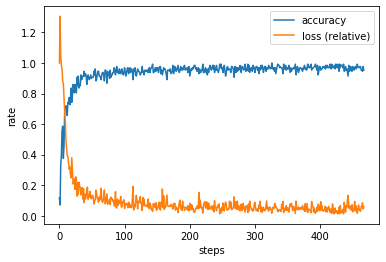

In [6]:
import matplotlib.pyplot as plt
import numpy as np
acc_list = np.array(acc_list, dtype=np.float64)
loss_list = np.array(loss_list, dtype=np.float64)
plt.plot(acc_list)
plt.plot(loss_list / loss_list[0])
plt.legend(['accuracy', 'loss (relative)'])
plt.xlabel('steps')
plt.ylabel('rate')
plt.show()